In [1]:
import numpy as np
import matplotlib.pyplot as plt 

# Linear Regression

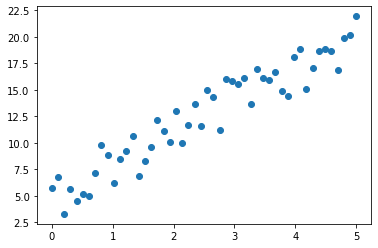

In [6]:
# Creating data
x = np.linspace(0,5,50)
y = 3*x + 5 + 5*(np.random.random(x.shape) - 0.5)
plt.scatter(x,y)

In [7]:
A = np.array([
    [x.dot(x), np.sum(x)],
    [np.sum(x), len(x)]
])
b = np.array([
    x.dot(y),
    np.sum(y)
])

In [10]:
coefs = np.linalg.inv(A).dot(b)
print("coefficients: ",coefs)

coefficients:  [3.09682347 4.88584622]


In [203]:
# Linear Regression higher dimension
x = 5*np.random.random((20,2))
y = 4*x[:,0] + 5*x[:,1] + 10 + 3*(np.random.random(len(x)) - 0.5)

In [204]:
class LinearRegression:
#     def __init__(self):
        
    def fit(self,x,y):
        N,dim = x.shape
        x_tmp = np.ones((N,dim+1))
        x_tmp[:,:-1] = x # adding one more cols of ones for the independent coeff.
        A = np.zeros((dim+1,dim+1))
        b = np.zeros((dim+1))
        for i in range(dim + 1):
            for j in range(i,dim + 1):
                A[i][j] = x_tmp[:,i].dot(x_tmp[:,j])
                A[j][i] = A[i][j]
            b[i] = x_tmp[:,i].dot(y)
        Ainv = np.linalg.inv(A)
        coeffs = Ainv.dot(b)
        self.coeffs = coeffs
    
    def predict(self,x):
        return x.dot(self.coeffs[:-1]) + self.coeffs[-1]

In [205]:
model = LinearRegression()
model.fit(x,y)
print(model.coeffs)

[4.18776099 5.02432733 9.68224223]


# PCA: Principal Component Analysis

In [144]:
class PCA:
    def __init__(self,n_components):
        self.n_components = n_components
    def fit(self,x):
        N, dim = x.shape
        mean = np.sum(x,axis=0) / N
        d = (x - mean).reshape((N,dim,1))
        dT = d.transpose((0,2,1))
        sigma = np.sum(np.matmul(d,dT),axis=0) / N
        eigval, eigvec = np.linalg.eig(sigma)
        self.eigval = eigval
        self.eigvec = eigvec
        idxs = np.argsort(eigval)[:-self.n_components-1:-1]
        self.basis = eigvec[:,idxs]
    def predict(self,x):
        return x.dot(self.basis)

In [176]:
pca = PCA(2)

In [190]:
v1 = np.random.random((1,3))
v2 = np.random.random((1,3))
u = 10*np.random.random((20,1))
v = 10*np.random.random((20,1))
noise = np.random.random((20,3)) - 0.5
noise[:,:-1] = 0
x = u.dot(v1) + v.dot(v2) + 2*noise

In [191]:
pca.fit(x)

In [192]:
e1 = pca.eigval
e2 = pca.eigvec

In [193]:
print(e1,"\n",e2)
print(pca.basis)

[2.17788463e+01 6.33296077e-05 1.50569128e+00] 
 [[-0.59235287 -0.67270168 -0.44338531]
 [-0.52865676  0.73981454 -0.4161688 ]
 [-0.60798035  0.01212014  0.79385955]]
[[-0.59235287 -0.44338531]
 [-0.52865676 -0.4161688 ]
 [-0.60798035  0.79385955]]


In [194]:
norm2 = np.cross(e2[:,0],e2[:,2])
norm2 = norm2 / np.sqrt(norm2.dot(norm2))
print(norm2)

[-0.67270168  0.73981454  0.01212014]


In [195]:
norm1 = np.cross(v1.reshape(3),v2.reshape(3))
norm1 = norm1 / np.sqrt(norm1.dot(norm1))
print(norm1)

[-0.67335762  0.73919156  0.01361447]


In [196]:
pca.predict(x)

array([[ -4.33143137,   0.7058885 ],
       [ -9.78473552,   3.00056408],
       [ -7.7876741 ,   2.28814216],
       [-12.56639133,   2.15299703],
       [ -2.34426093,  -0.06649713],
       [-10.89950255,  -0.2708982 ],
       [ -1.54574951,  -0.72179521],
       [ -4.87834399,  -1.06781563],
       [-15.33177779,  -0.47935823],
       [-17.70080251,  -0.62868851],
       [-10.5377816 ,   1.24567595],
       [-15.29142272,  -0.58887111],
       [ -4.62275691,  -0.21326871],
       [-15.2218777 ,   0.38978624],
       [-11.63652726,  -2.14851825],
       [ -6.63854317,   1.18219483],
       [-13.56647347,   1.61127966],
       [ -9.21461246,   0.20833111],
       [ -9.01695448,   0.41331655],
       [-15.86381854,   0.15098092]])